#  MSCA 37011 - Deep Learning and Image Recognition


## MNIST classification using Keras/Tensorflow - CNN

Trains a simple convnet on the MNIST dataset. Gets to 99.25% test accuracy after 12 epochs with plenty of margin for parameter tuning. This takes 16 seconds per epoch on a GRID K520 GPU and 19 seconds on GTX 1060.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Format data for training
Our neural-network does not need a single 784 dimensional vector. However,we'll scale the inputs to be in the range [0-1] rather than [0-255]

In [3]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the CNN

Regularization - BatchNormalization and Dropouts are optional

In [4]:
#Using Keras Sequential API
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Compile the model
Keras is using TensorFlow as a backend. 

When compiling a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical crossentropy*, and is a loss function well-suited to comparing two probability distributions.

In [5]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## Visualize the network

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
__________

## Train Model
Feed the training data loaded in earlier into this model and it will learn to classify digits

In [7]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 200us/step - loss: 0.3286 - acc: 0.9025 - val_loss: 0.0627 - val_acc: 0.9801
Epoch 2/12
60000/60000 [==============================] - 10s 167us/step - loss: 0.1008 - acc: 0.9709 - val_loss: 0.0401 - val_acc: 0.9878
Epoch 3/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0695 - acc: 0.9799 - val_loss: 0.0391 - val_acc: 0.9874
Epoch 4/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0564 - acc: 0.9837 - val_loss: 0.0329 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 10s 160us/step - loss: 0.0474 - acc: 0.9856 - val_loss: 0.0304 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 17s 287us/step - loss: 0.0396 - acc: 0.9881 - val_loss: 0.0326 - val_acc: 0.9895
Epoch 7/12
60000/60000 [==============================] - 22s 372us/st

## Evaluate performance

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)

Test loss: [0.028194552557827046, 0.9918]


## Loss curve

Text(0.5, 1.0, 'Loss Curves')

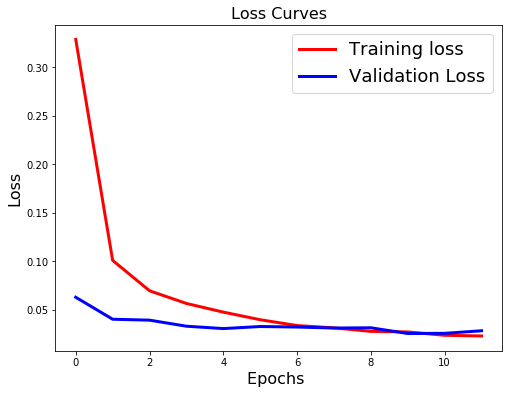

In [9]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

## Inspect the output

Inspect the output and look at some examples it gets right, and some examples it gets wrong. The predict_classes function outputs the highest probability class according to the trained classifier for each input example.

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
predicted_classes = model.predict_classes(x_test)

#print(predicted_classes)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

#print(correct_indices)
#print(incorrect_indices)

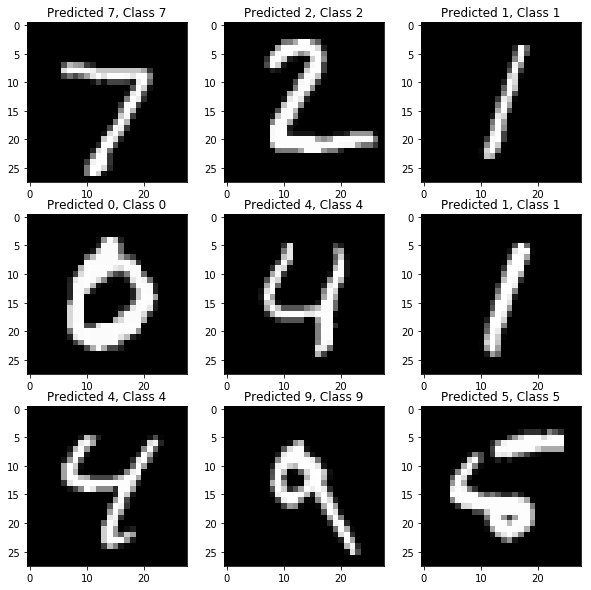

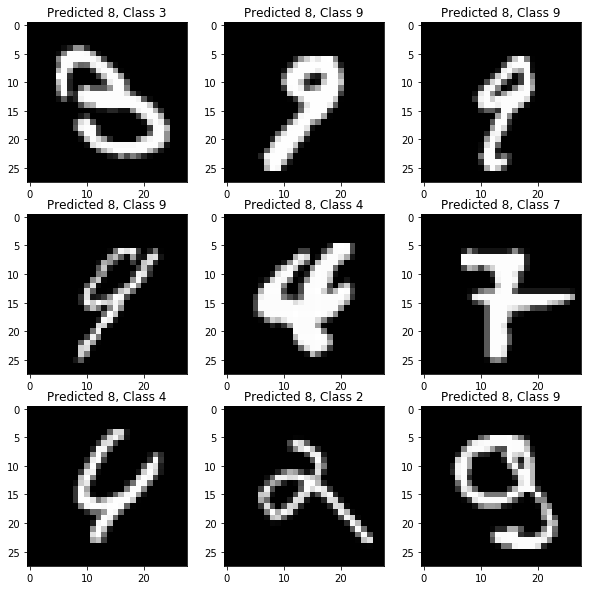

In [11]:
#some of the correct results
plt.figure(figsize=(10,10))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
#some of the incorrect predictions
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))